In [2]:
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
from scipy.integrate import quad # Functions of integrals calculs

In [3]:
# Functions for our program

def an(n, w, function, t0):
    '''
    Возвращает значение коэффициента a_n
    n - номер гармоники, w - угловая частота, function - функция сигнала, t0 - начальное время.
    '''
    T = 2 * np.pi / w
    return (2/T) *\
        (quad(lambda t: np.cos(n*w*t) * function(t), t0, t0+T))[0]


def bn(n, w, function, t0):
    '''
    Возвращает значение коэффициента b_n
    n - номер гармоники, w - угловая частота, function - функция сигнала, t0 - начальное время.
    '''
    T = 2 * np.pi / w
    return (2/T) *\
        (quad(lambda t: np.sin(n*w*t) * function(t), t0, t0+T))[0]

def Fourier(function, t0, T, N, t):
    '''
    Возвращает значения ряда Фурье для каждого момента времени из временной шкалы x.
    function - функция сигнала, t0 - начальное время, T - период сигнала,
    N - количество гармоник для расчета ряда Фурье, x - временная шкала.
    args - дополнительные аргументы для функции function.

    '''
    w = np.pi * 2 / T
    a0 = (2/T) * (quad(lambda t: function(t), t0, t0+T))[0]


    def F(t): return a0/2 + \
        sum(an(n, w, function, t0)*np.cos(n*w*t) +
            bn(n, w, function, t0)*np.sin(n*w*t)
            for n in range(1, N))
    return [F(i) for i in t]



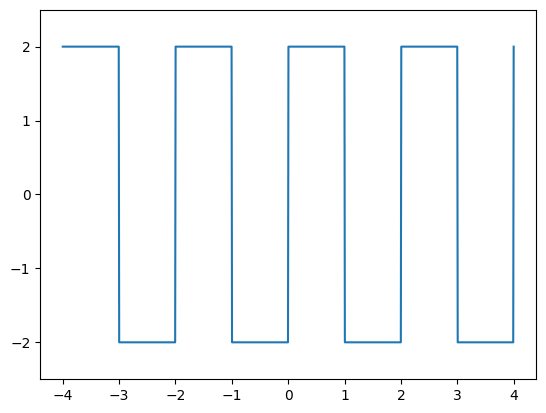

In [4]:
# Write of periodic signal

def square_signal(t, A, T):
    '''
    Функция возвращает значение прямоугольного сигнала в заданный момент времени t.
    t - момент времени, A - амплитуда сигнала, T - период сигнала.
    '''
    return A * signal.square(2 * np.pi * t / T)

# Начальное и конечное время для генерации прямоугольного сигнала
t0_square = -4
t1_square = 4

# Амплитуда и период сигнала
A_square = 2
T_square = 2

# Количество точек для генерации прямоугольного сигнала
num_square = 1000

# Генерация временной шкалы с равномерным шагом.
t_square = np.linspace(t0_square, t1_square, num_square)
# Генерация значений прямоугольного сигнала для каждого момента времени.
y = [square_signal(t, A_square, T_square) for t in t_square]

plt.plot(t_square, y)
plt.ylim(-2.5, 2.5)
plt.show()

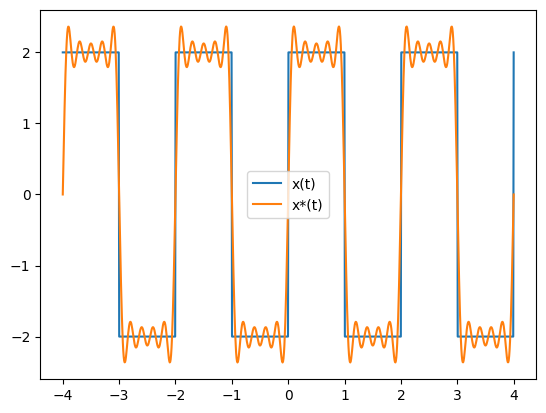

In [5]:
# 1)

# Количество гармоник для расчета ряда Фурье.
N_square = 10

# Расчет значений ряда Фурье для прямоугольного сигнала.
y_ = Fourier(lambda t: square_signal(t, A_square, T_square),
             t0_square, T_square, N_square, t_square)

plt.plot(t_square, y, label = 'x(t)')
plt.plot(t_square, y_, label = 'x*(t)')
plt.legend()
plt.show()

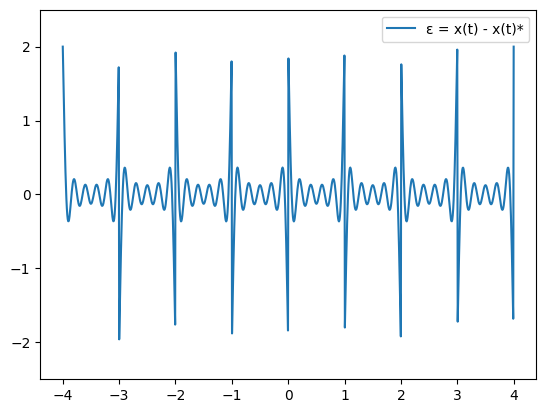

In [6]:
eps = [a - b for a, b in zip(y, y_)]
plt.plot(t_square, eps, label = 'ε = x(t) - x(t)*')
plt.ylim(-2.5, 2.5)
plt.legend()
plt.show()

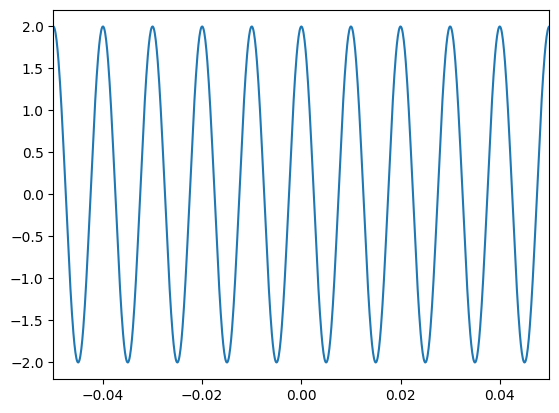

In [7]:
# 2)
def cos_signal(t, A, w):
    '''
    Функция возвращает значение косинусоидального сигнала в заданный момент времени t.
    t - время, A - амплитуда сигнала, f - частота сигнала.
    '''
    return A * np.cos(w * t)

# Начальное и конечное время для генерации сигнала
t0_cos = -0.5
t1_cos = 0.5

# Частота и амплитуда сигнала
f_cos = 100
w_cos = 2 * np.pi * f_cos
A_cos = 2

# Количество точек для генерации косинусоидального сигнала
num_cos = 10000

# Количество гармоник для расчета ряда Фурье.
N_cos = 2

# Генерация временной шкалы с равномерным шагом.
t_cos = np.linspace(t0_cos, t1_cos, num_cos)

# Расчет значений ряда Фурье для косинусоидального сигнала.
ycos_ = Fourier(lambda t: cos_signal(t, A_cos, w_cos),
              t0_cos, 1 / f_cos, N_cos, t_cos)

plt.xlim(-0.05, 0.05)
plt.plot(t_cos, ycos_)

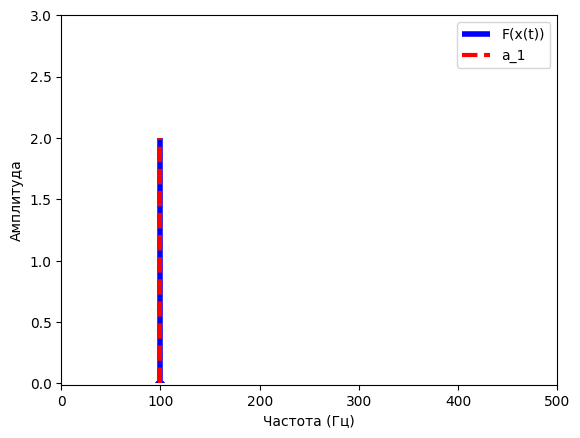

In [8]:
# Вычисление DFT сигнала ycos_
y2_dft = np.fft.fft(ycos_)

# Вычисление частот
freq_cos = np.fft.fftfreq(len(t_cos), d=(t_cos[1]-t_cos[0]))

a1_cos = an(1, w_cos, lambda t: cos_signal(t, A_cos, w_cos), t0_cos)

# Построение графика спектра
plt.vlines(freq_cos, 0, np.abs(y2_dft) / num_cos * 2, color='b', linewidth=4, label = 'F(x(t))')

# Наложение a_1
plt.vlines([f_cos], 0, a1_cos, colors='r', label='a_1', linewidth=3, linestyles='dashed')

plt.xlabel('Частота (Гц)')
plt.ylabel('Амплитуда')
plt.xlim(0, 500)
plt.ylim(-0.01, A_cos+A_cos/2)
plt.legend()
plt.show()

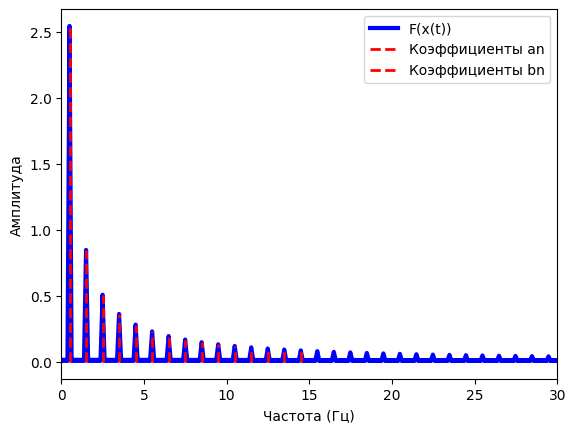

In [11]:
# 3)

w_square = 2 * np.pi / T_square
N_square = 30

# Вычисление коэффициентов
an_ = [an(n, w_square, lambda t: square_signal(t, A_square, T_square), t0_square) for n in range(N_square)]
bn_ = [bn(n, w_square, lambda t: square_signal(t, A_square, T_square), t0_square) for n in range(N_square)]
# Вычисление DFT сигнала y
ydft = np.fft.fft(y)

# Вычисление частот
freq_square = np.fft.fftfreq(len(t_square), d=(t_square[1]-t_square[0]))
# Ось частот для коэффициентов
freq = np.arange(start=0, stop=N_square/T_square, step=1/T_square)

# Построение графика спектра
plt.plot(freq_square, np.abs(ydft) / num_square * 2, color='b', linewidth=3, label = 'F(x(t))')
plt.vlines(freq, 0, an_, colors='r', label='Коэффициенты an', linewidth=2, linestyles='dashed')
plt.vlines(freq, 0, bn_, colors='r', label='Коэффициенты bn', linewidth=2, linestyles='dashed')

plt.xlabel('Частота (Гц)')
plt.ylabel('Амплитуда')
plt.xlim(0, 30)
plt.legend()
plt.show()

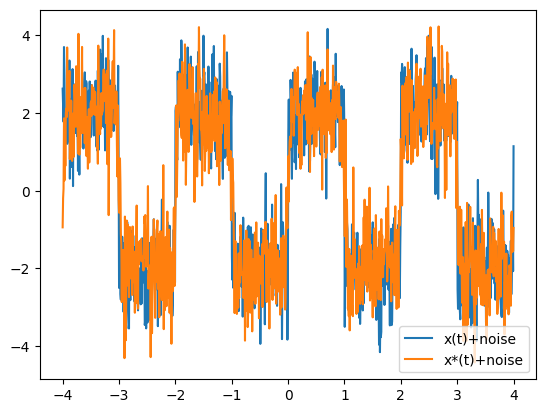

In [12]:
# 4)
def add_noise(signal, noise_level=0.01):
    '''
    Добавление к сигналу гауссовского шума 
    '''
    return signal + np.random.normal(0, noise_level, len(signal))


ynoise = add_noise(y, 0.8)
y_noise = add_noise(y_, 0.8)

plt.plot(t_square, ynoise, label = 'x(t)+noise')
plt.plot(t_square, y_noise, label = 'x*(t)+noise')
plt.legend()
plt.show()

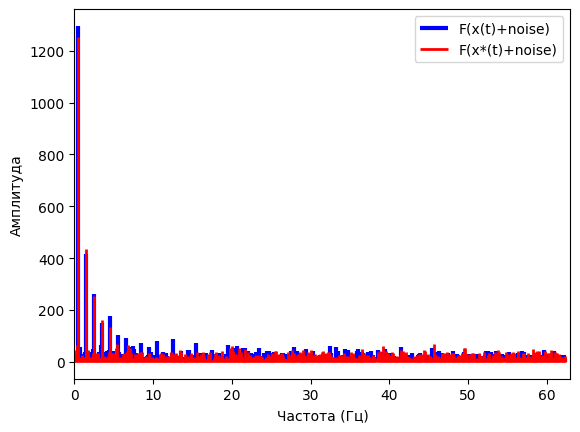

In [13]:
# Вычисление DFT сигнала y_noise
ynoise_dft = np.fft.fft(ynoise)
y_noise_dft = np.fft.fft(y_noise)

plt.vlines(freq_square, 0, np.abs(ynoise_dft), colors='b', linewidth=3,  label='F(x(t)+noise)')
plt.vlines(freq_square, 0, np.abs(y_noise_dft), colors='r', linewidth=2, label='F(x*(t)+noise)')

plt.xlim(0,63)
plt.xlabel('Частота (Гц)')
plt.ylabel('Амплитуда')
plt.legend()
plt.show()